### MODELADO DE DATOS

In [1]:
#Comenzamos importando las librerías necesarias
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn import neighbors
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import NuSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Cargamos el conjunto de datos
filename = "../data/base_preprocesado.csv"
data = pd.read_csv(filename)

In [3]:
#Comprobamos que se ha cargado correctamente
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
#Cargamos los otros conjuntos de datos
filename1 = "../data/X_train.csv"
filename2 = "../data/X_test.csv"
filename3 = "../data/y_train.csv"
filename4 = "../data/y_test.csv"

X_train = pd.read_csv(filename1)
X_test = pd.read_csv(filename2)
y_train = pd.read_csv(filename3)
y_test = pd.read_csv(filename4)


In [5]:
#Comprobamos que se han cargado correctamente
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V24,V25,V26,V27,V28,Amount
0,1.012595,0.185411,1.857002,2.625675,-0.813686,0.741198,-1.050510,0.411449,1.078229,0.410744,...,-1.766324,-0.240469,0.167722,0.665253,0.149377,0.061452,0.073725,0.024623,0.023365,12.16
1,1.929110,-0.637219,0.002467,0.277613,-0.835194,0.335546,-1.121181,0.360743,1.303539,0.155439,...,-0.034408,-0.226746,0.040977,0.198945,0.697337,-0.624296,0.310175,-0.013563,-0.042880,4.99
2,1.182737,-1.156850,1.079621,-0.413579,-1.671783,0.040173,-1.272085,0.263822,0.278398,0.423978,...,0.314613,0.043047,0.162604,0.385426,0.072680,0.203746,-0.167881,0.046775,0.030950,71.92
3,2.178247,-1.472885,-0.697008,-1.419590,-1.475410,-0.852524,-1.043807,-0.290200,-1.240592,1.502822,...,-0.282191,-0.285858,-0.111241,0.151666,-0.005200,-0.255401,-0.183330,0.020958,-0.036176,66.00
4,1.616164,-0.915927,-1.687828,0.220307,-0.110584,-0.593453,0.272640,-0.171075,0.249951,0.256631,...,-0.007905,0.233313,0.383392,0.599900,0.825674,-0.072261,0.710245,-0.147041,-0.035975,229.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226975,2.228543,-1.567987,-1.581274,-1.638552,-0.723433,-0.019712,-0.973196,-0.075987,-1.329295,1.691269,...,0.548810,-0.342555,0.016198,0.538773,0.223731,0.246228,0.099140,-0.020681,-0.065602,59.29
226976,-3.143138,-0.375485,1.110079,1.580071,1.888033,0.092566,1.149447,-0.380869,-1.100038,1.135804,...,-1.577824,-1.352575,-0.228987,0.340582,-0.234832,0.580277,-0.023141,-0.780843,0.363664,111.06
226977,-0.581294,1.327858,1.206441,0.007123,0.067904,-1.006753,0.718263,-0.096415,-0.294980,-0.216522,...,-0.124130,0.275089,-0.288499,-0.661535,0.348269,-0.089580,0.074641,0.359116,0.159540,1.78
226978,-0.771670,1.589985,-0.865454,-0.658085,0.841181,-0.765771,0.897101,0.009378,0.154664,-0.170615,...,-0.346774,0.266341,-0.392098,-0.712547,0.535096,-0.272581,0.088535,0.046118,-0.083461,12.99


### ELECCIÓN DEL MODELO

En esta celda vamos a añadir a una lista varios modelos de clasificaciónpara predecir los clientes fraudulentos del conjunto de datos. Los modelos que voy a incluir son Regresión Logística, Análisis Discriminante Lineal, Árbol de Decisión,Naive Bayes Gaussiano y el Random Forest.
A partir de esto analizaremos sus métricas de rendimiento, como la precisión , el recall y el F1-Score, para determinar cuál considero que es el más adecaudo para este problema específico.

In [6]:
models=[]
models.append(('LoR', LogisticRegression(solver='lbfgs')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('K-NN', KNeighborsClassifier(n_neighbors=10)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
#models.append(('SVC', SVC(gamma='auto', C=2.0, kernel='linear')))
# Modelos adicionales
#models.append(('GB', GradientBoostingClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('LGBM', LGBMClassifier()))
#models.append(('CatBoost', CatBoostClassifier()))

Por último, como vimos que el conjunto de datos estaba desbalanceado, haremos uso de la librería SMOTE para hacer over sampling y mejorar el recalll y el f1-Score de todos los modelos

In [8]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=123,sampling_strategy=0.25)
X_sm,y_sm = sm.fit_resample(X_train,y_train)
                           
print(f"X antes de SMOTE:",{X_train.shape})
print(f"X despues de SMOTE:",{X_sm.shape})

X antes de SMOTE: {(226980, 28)}
X despues de SMOTE: {(283262, 28)}


In [9]:
print("Balance positivo y negativo de las clases:")
y_sm.value_counts(normalize=True)*100

Balance positivo y negativo de las clases:


Class
0        80.000141
1        19.999859
Name: proportion, dtype: float64

Ahora un 20 %del dataset pertenece a la clase 1, lo que para ser un conjunt de datos para la detección del fraude es una buena proporción para que el modelo pueda entrenar y aprender.

In [ ]:
#VAmos a verlo gráficamente
sns.countplot(x=y_sm,color="salmon")
plt.title("Datos balanceados")

Volvemos a dividir el conjunto de dtaos pero utilizancdo como datos de entrenamiento los nuevos despues del oversampling.

In [11]:
X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(X_sm,y_sm,test_size=0.2,random_state=123,shuffle=True)

Se procede a crear una función para hacer la matriz de confusión de cada uno de los modelos.

In [12]:
def evaluate_model(y_test, pred_y):
    cm = confusion_matrix(y_test, pred_y, normalize='true')
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='coolwarm')#, xticklabels=ConfusionMatrixDisplay.from_predictions(y_test, pred_y).display_labels, yticklabels=ConfusionMatrixDisplay.from_predictions(y_test, pred_y).display_labels)
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print(classification_report(y_test, pred_y))

confusion matrix of: {LogisticRegression()}


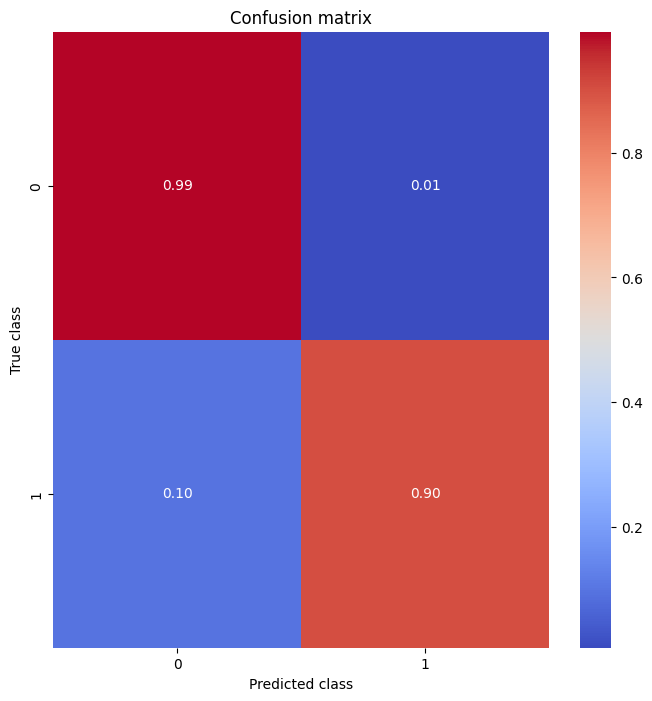

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56643
           1       0.22      0.90      0.36       103

    accuracy                           0.99     56746
   macro avg       0.61      0.95      0.68     56746
weighted avg       1.00      0.99      1.00     56746

confusion matrix of: {LinearDiscriminantAnalysis()}


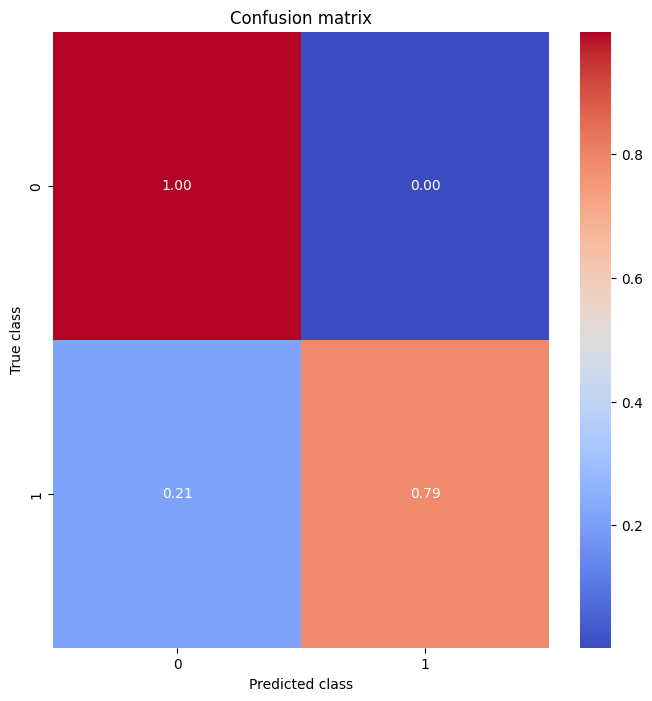

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56643
           1       0.49      0.79      0.60       103

    accuracy                           1.00     56746
   macro avg       0.75      0.89      0.80     56746
weighted avg       1.00      1.00      1.00     56746

confusion matrix of: {KNeighborsClassifier(n_neighbors=10)}


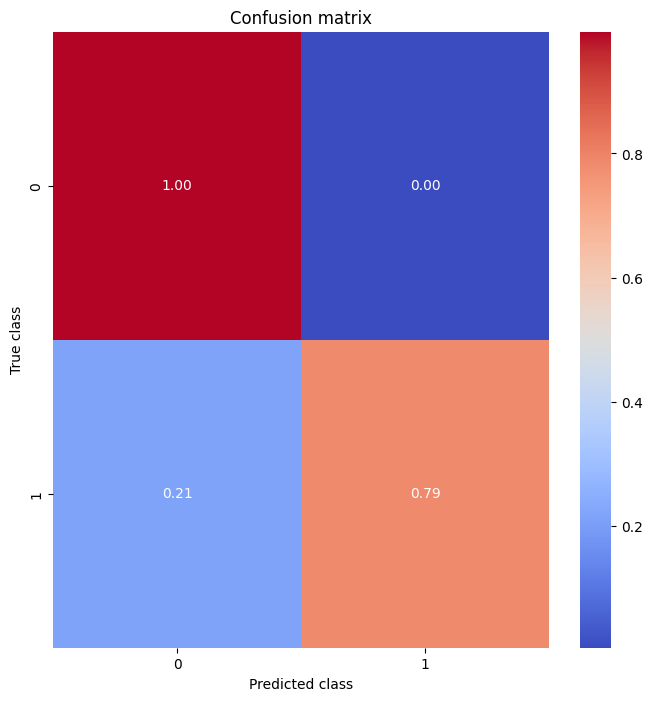

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56643
           1       0.26      0.79      0.39       103

    accuracy                           1.00     56746
   macro avg       0.63      0.89      0.70     56746
weighted avg       1.00      1.00      1.00     56746

confusion matrix of: {DecisionTreeClassifier()}


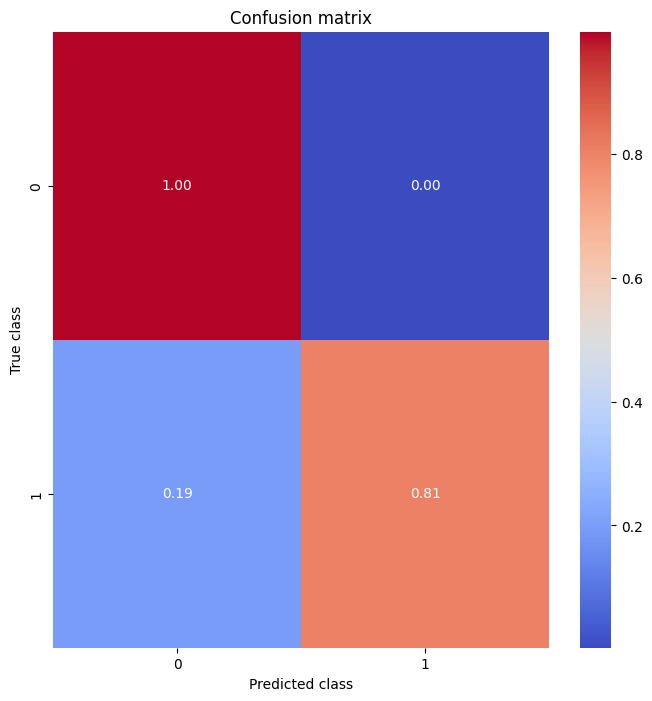

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56643
           1       0.37      0.81      0.50       103

    accuracy                           1.00     56746
   macro avg       0.68      0.90      0.75     56746
weighted avg       1.00      1.00      1.00     56746

confusion matrix of: {GaussianNB()}


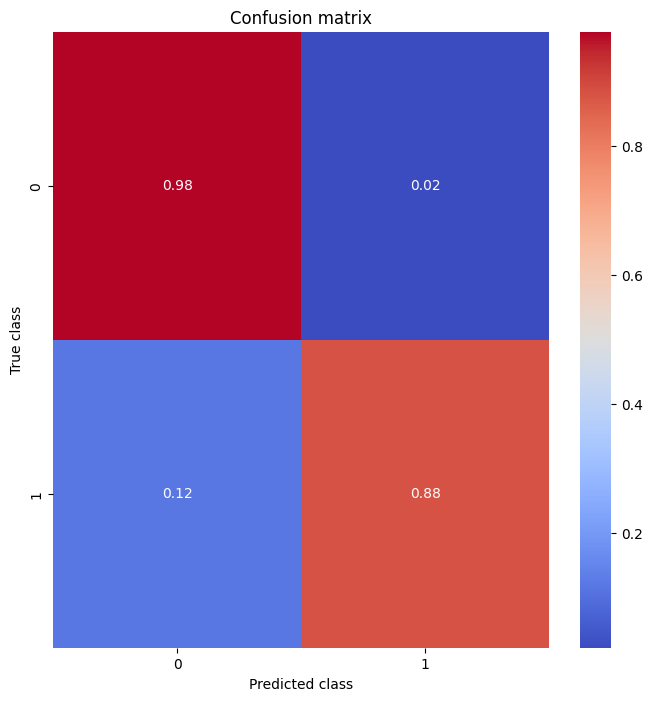

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56643
           1       0.07      0.88      0.12       103

    accuracy                           0.98     56746
   macro avg       0.53      0.93      0.56     56746
weighted avg       1.00      0.98      0.99     56746

confusion matrix of: {RandomForestClassifier()}


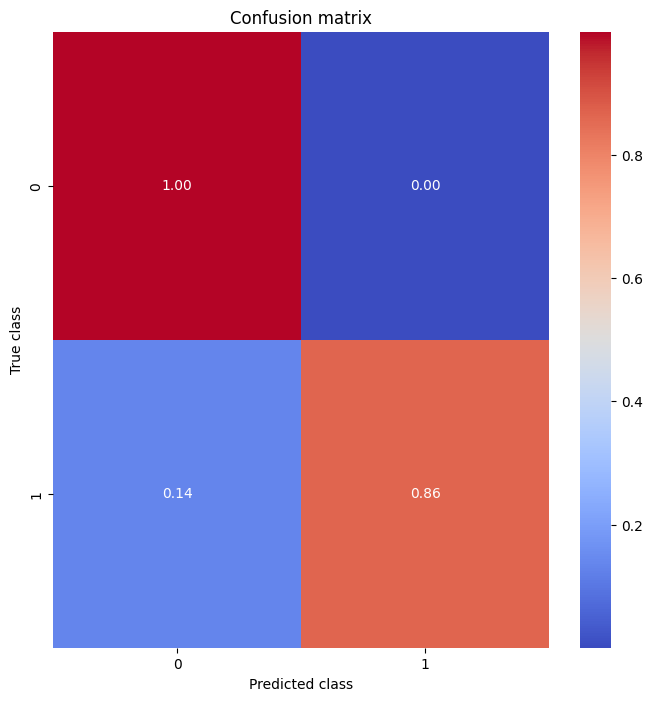

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56643
           1       0.86      0.86      0.86       103

    accuracy                           1.00     56746
   macro avg       0.93      0.93      0.93     56746
weighted avg       1.00      1.00      1.00     56746

confusion matrix of: {AdaBoostClassifier()}


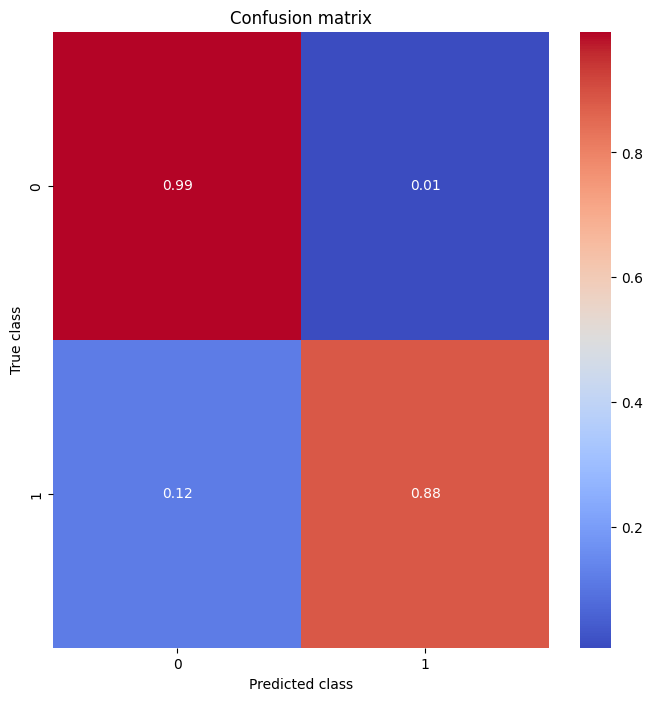

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56643
           1       0.19      0.88      0.32       103

    accuracy                           0.99     56746
   macro avg       0.60      0.94      0.66     56746
weighted avg       1.00      0.99      1.00     56746

confusion matrix of: {SGDClassifier()}


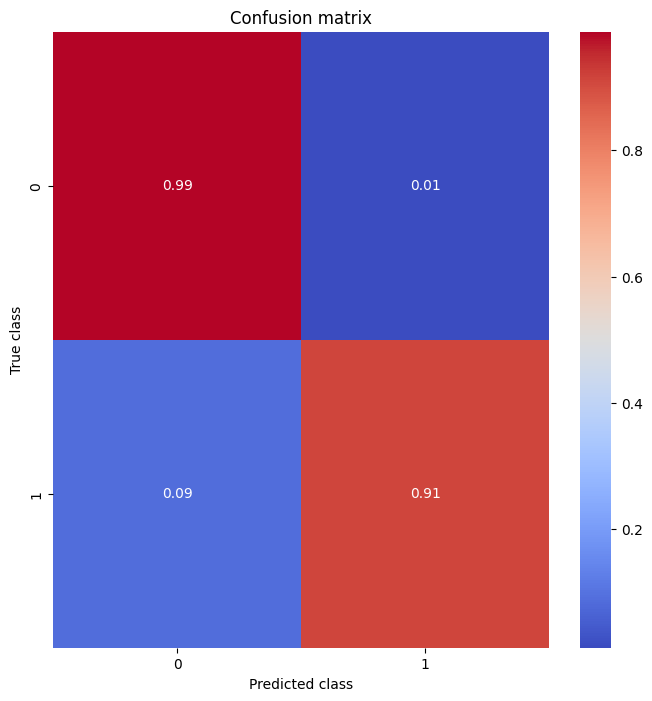

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56643
           1       0.12      0.91      0.21       103

    accuracy                           0.99     56746
   macro avg       0.56      0.95      0.60     56746
weighted avg       1.00      0.99      0.99     56746

confusion matrix of: {XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_st

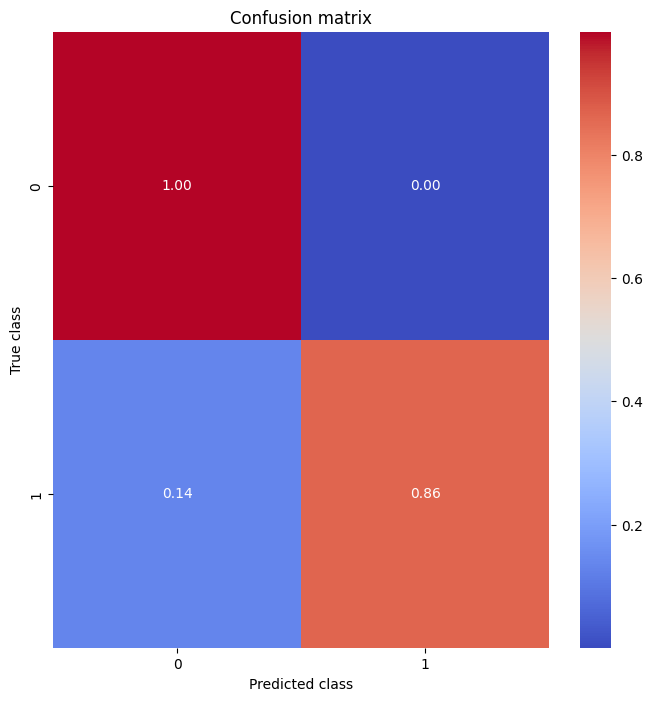

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56643
           1       0.78      0.86      0.82       103

    accuracy                           1.00     56746
   macro avg       0.89      0.93      0.91     56746
weighted avg       1.00      1.00      1.00     56746

[LightGBM] [Info] Number of positive: 45260, number of negative: 181349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 226609, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199727 -> initscore=-1.388000
[LightGBM] [Info] Start training from score -1.388000
confusion matrix of: {LGBMClassifier()}


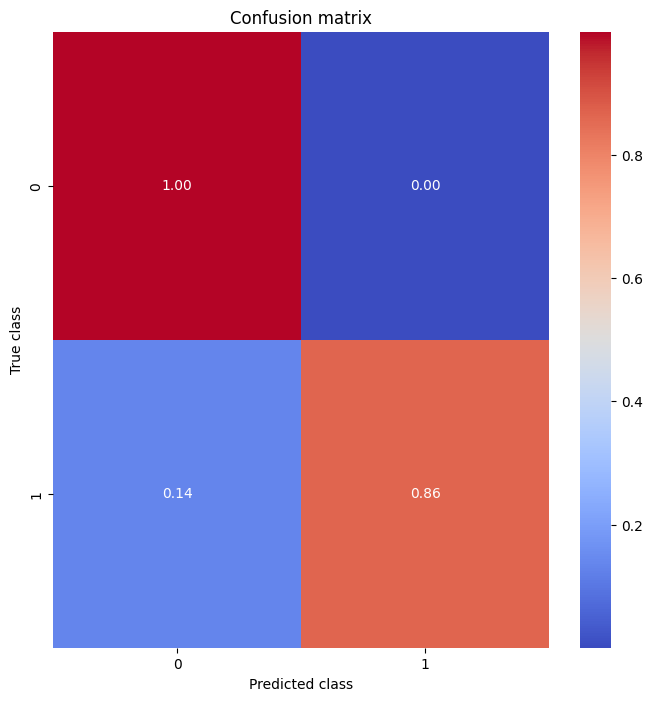

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56643
           1       0.75      0.86      0.81       103

    accuracy                           1.00     56746
   macro avg       0.88      0.93      0.90     56746
weighted avg       1.00      1.00      1.00     56746



In [21]:
for name,model in models:
    model.fit(X_train_sm,y_train_sm)
    pred_y = model.predict(X_test)
    print("confusion matrix of:",{model})
    evaluate_model(y_test, pred_y)

•	LogisticRegression: Este algoritmo muestra una precisión baja de 0.22, lo que indica un elevado número de falsos positivos, aunque su recall de 0.90 sugiere que el modelo es capaz de identificar la mayoría de los fraudes, pero con una f1-score de 0.36, refleja que el balance entre precisión y recall no es el óptimo.

•	LinearDiscriminantAnalysis (LDA): Este algoritmo presenta una precisión de 0.49 y un recall de 0.79, por lo tanto, muestra un rendimiento intermedio, con un f1-score de 0.60, lo que sugiere que es moderadamente efectivo para la tarea.

•	KNeighborsClassifier y GaussianNB: Estos algoritmos muestran rendimientos menos favorables con f1-scores de 0.39 y 0.12 respectivamente, reflejando problemas importantes en el equilibrio entre precisión y recall, especialmente en el caso de GaussianNB.

•	XGBClassifier: Este algoritmo presenta una precisión mucho más alta de 0.78 y un recall de 0.86, resultando en un f1-score sólido de 0.82. Lo que muestra que el modelo tiene un buen equilibrio entre la identificación correcta de fraudes y la minimización de falsos positivos.

•	DecisionTreeClassifier: Este algoritmo tiene una precisión bastante baja de 0.37, aunque su recall es alto (0.81), lo que lleva a un f1-score de 0.50. Es decir, este algoritmo tiende a identificar muchos fraudes, pero con un número significativo de falsos positivos.

•	RandomForestClassifier: Este algoritmo es uno de los mejores evaluados, con una precisión y recall ambos de 0.86, y un f1-score entonces también de 0.86. Este resultado presenta un excelente equilibrio para la clasificación de fraudes.

•	AdaBoostClassifier y SGDClassifier: Estos algoritmos presentan f1-scores bastante bajos de 0.32 y 0.21, respectivamente. Esto indica que estos dos algoritmos son menos efectivos para la tarea de clasificación de fraudes en comparación con los demás algoritmos elegidos.

•	LGBMClassifier: Este algoritmo destaca con un f1-score de 0.81, se muestra como un fuerte competidor, obteniendo una precisión y un recall de 0.75 y 0.86 respectivamente, lo que lo posiciona muy cerca del rendimiento del XGBClassifier.


Nos quedamos con el algoritmo Random Forest Classifier:

confusion matrix of: {RandomForestClassifier()}


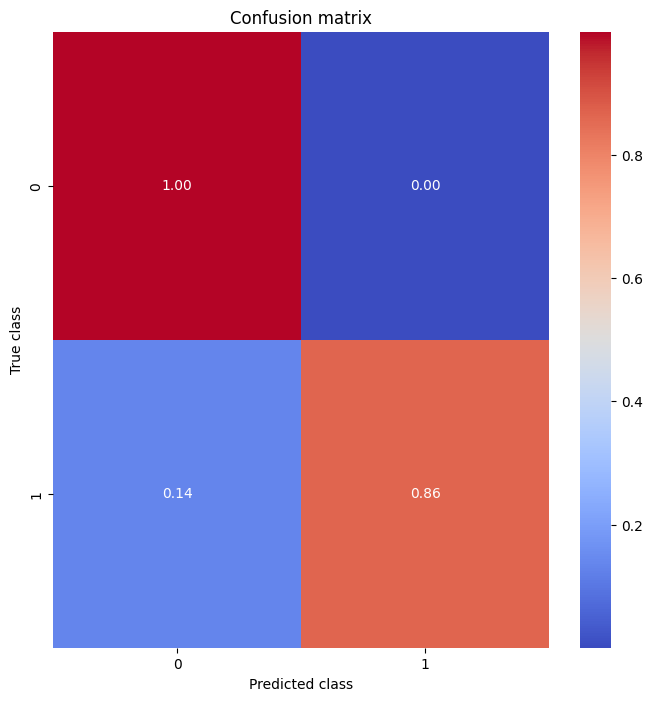

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56643
           1       0.86      0.86      0.86       103

    accuracy                           1.00     56746
   macro avg       0.93      0.93      0.93     56746
weighted avg       1.00      1.00      1.00     56746



In [22]:
model = RandomForestClassifier()
model.fit(X_train_sm,y_train_sm)
pred_y = model.predict(X_test)
print("confusion matrix of:",{model})
evaluate_model(y_test, pred_y)

Ahora se sigue con la búsqueda de los mejores hiperparámetros para el modelo. Para esta búsqueda de hiperparametros utilizaremos la técnica Grid Search que hace una busqueda exahustiva de todos los hiperparametros dados.

Para La búsqueda de estos hiperparámetros utilizaremos un scoring cuya metrica principal sea el f1-score que es el que decidimos que era el más importante para nuestro modelo de clasificación para la detección de fraudes.

In [13]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, confusion_matrix, classification_report

# Definir el parámetro grid reducido para RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200],  # Número de árboles en el bosque
    'max_depth': [10, 20],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5],  # Número mínimo de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2],  # Número mínimo de muestras necesarias en una hoja
    'max_features': ['sqrt', 'log2'],  # Número de características a considerar en cada división
    'bootstrap': [True]  # Usar bootstrap al construir los árboles
}

# Crear una instancia del modelo RandomForestClassifier
model = RandomForestClassifier(random_state=12345)

# Definir el scoring para GridSearchCV
scorer = make_scorer(f1_score, pos_label=1)

# Usar GridSearchCV para la búsqueda de hiperparámetros
CV = GridSearchCV(model, param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Medir el tiempo de entrenamiento
start_time = time.time()
CV.fit(X_train_sm, y_train_sm)
end_time = time.time()

# Calcular el tiempo transcurrido
training_time = end_time - start_time

# Imprimir los mejores parámetros, el mejor score y el tiempo de entrenamiento
print("Mejores parámetros:", CV.best_params_)
print("Mejor score:", CV.best_score_)
print("Tiempo de entrenamiento:", training_time, "segundos")

# Evaluar el modelo en el conjunto de prueba
y_pred = CV.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Mejores parámetros: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mejor score: 0.9981424293828642
Tiempo de entrenamiento: 7014.976567268372 segundos
[[56629    14]
 [   14    89]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56643
           1       0.86      0.86      0.86       103

    accuracy                           1.00     56746
   macro avg       0.93      0.93      0.93     56746
weighted avg       1.00      1.00      1.00     56746



confusion matrix of: {RandomForestClassifier(max_depth=20, n_estimators=200, random_state=100)}


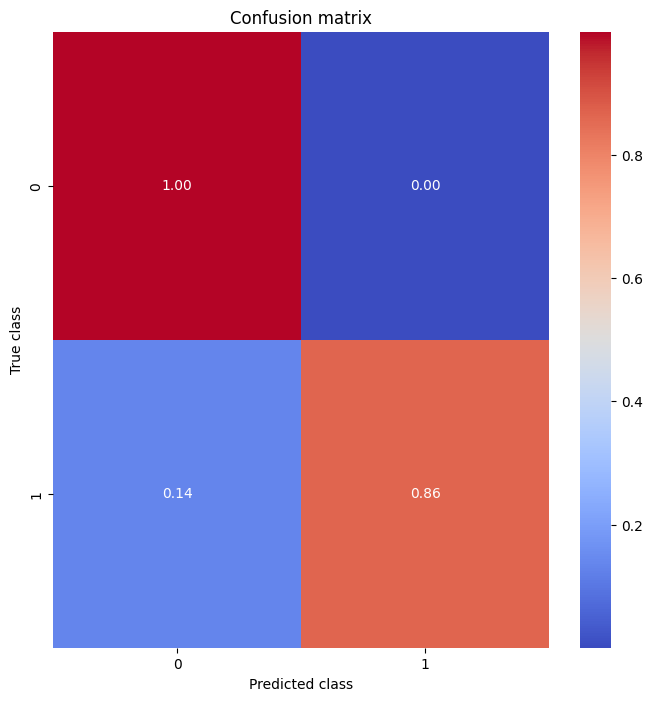

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56643
           1       0.87      0.86      0.87       103

    accuracy                           1.00     56746
   macro avg       0.94      0.93      0.93     56746
weighted avg       1.00      1.00      1.00     56746



In [16]:
#Entrenamos el modelo con los mejores hiperparámetros
SEED=100
model = RandomForestClassifier(random_state=SEED,bootstrap=True, max_depth=20, max_features='sqrt', min_samples_leaf=1, n_estimators=200, min_samples_split=2)
model.fit(X_train_sm,y_train_sm)
pred_y = model.predict(X_test)
print("confusion matrix of:",{model})
evaluate_model(y_test, pred_y)

### IMPORTAMOS EL MODELO PARA EL FUTURO

In [17]:
import pickle

In [18]:
# guardo modelo entrenado en formato pickle
with open('../models/RFC.pkl', 'wb') as f:
    pickle.dump(model, f) # dump es la función para guardar el objeto model (LDA entrenado)

In [19]:
# ahora importo el modelo guardado y lo guardo en el nuevo objeto random_forest
RFC = pickle.load(open('../models/RFC.pkl','rb'))

In [20]:
# verifico que el objeto se cargó correctamente
RFC

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=100)

Hacemos una validacion cruzada del modelo para comprobar su robustez

In [26]:
# Validación cruzada con 5 particiones
cv_scores = cross_val_score(RFC, X_train_sm, y_train_sm, cv=5)

# Imprimir los resultados de cada partición y la media
print("Scores de validación cruzada:", cv_scores)
print("Media de la precisión:", np.mean(cv_scores))

Scores de validación cruzada: [0.99916156 0.99944839 0.99931601 0.99909536 0.99927186]
Media de la precisión: 0.9992586349757765


Los valores obtenidos son consistentemente altos, con una media de precisión de 0.9992586349757765. Esto indica como resultado un modelo con un excelente rendimiento predictivo y con una variabilidad muy baja en las diferentes particiones del conjunto de datos utilizado.

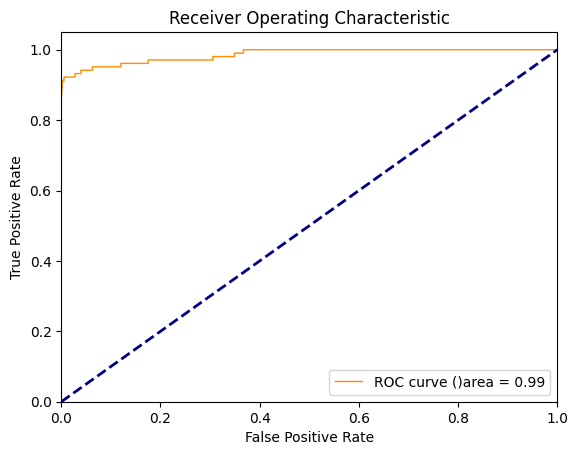

In [22]:
#PROCEDEMOS A HACER EL AREA BAJO LA CURVA
from sklearn.metrics import roc_curve, auc
#Predecir las probabilidades para los conjuntos de prueba
y_pred_prob = RFC.predict_proba(X_test)[:,1]

#Calcular la curva ROC
fpr, tpr, tresholds = roc_curve(y_test, y_pred_prob)

#Calcular el AUC
roc_auc = auc(fpr, tpr)

#Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
        lw=1, label='ROC curve ()area = %0.2f'
        % roc_auc)
plt.plot([0,1],[0,1], color='navy',
         lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Esta curva ROC y el AUC de 0.99 muestran que el modelo de RandomForestClassifier seleccionado tiene un rendimiento excepcional en la detección de fraudes bancarias, lo que sugiere que es altamente efectivo para distinguir entre transacciones legítimas y fraudulentas. Esto es crítico en aplicaciones del mundo real, donde la capacidad de identificar correctamente las transacciones fraudulentas mientras se minimizan las falsas alarmas es fundamental para la seguridad y la eficiencia operativa de las instituciones financieras.

Por último utlizamos la Curva de Ganancia para evaluar el rendimiento de mi modelo de clasificación. Esta curva me ayudará a comprender cómo se compara nuestro modelo con una estrategia de referencia (línea de base) y cómo varía el beneficio acumulado a medida que aumentamos el porcentaje de muestras seleccionadas. Es especialmente útil en problemas de clasificación desequilibrados.

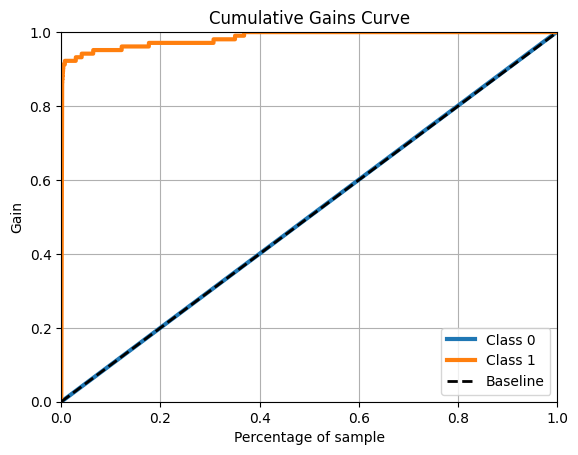

In [23]:
# The magic happens here
import matplotlib.pyplot as plt
import scikitplot as skplt
predict_proba = RFC.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, predict_proba)
plt.show()

En la gráfica se pueden diferencia 3 lineas distintas. La línea naranja es la curva que representa la clase positiva, es decir, las transacciones fraudulentas. La curva comienza en la esquina inferior izquierda (0,0) y asciende rápidamente, lo que indica que el modelo es muy efectivo en la detección de fraudes, identificando una gran proporción de casos positivos con una pequeña cantidad de datos procesados. La línea azul es la curva que representa la clase negativa, es decir, las transacciones legítimas. Como se puede observar en la gráfica, esta curva también refleja que el modelo seleccionado tiene una alta capacidad para identificar correctamente las instancias no fraudulentas. Por último, la línea discontinua diagonal, al igual que en la gráfica de la curva ROC, representa un modelo aleatorio, donde el porcentaje de verdaderos positivos acumulados aumenta linealmente con el porcentaje de la muestra seleccionada.
En este caso, la curva de ganancia acumulativa para las instancias cuyo valor en la variable “Class” es 1, es decir, las instancias fraudulentas, muestra una ganancia cercana al 100% al procesar aproximadamente el 10% de las muestras. Esto sugiere que el modelo es extremadamente eficaz en la identificación de fraudes con un número reducido de transacciones analizadas. Lo que indica un alto rendimiento en términos de sensibilidad y eficiencia, lo cual es realmente crítico en contextos donde es crucial minimizar la cantidad de transacciones fraudulentas no detectadas.


### GUARDAMOS LOS DATOS DE ENTRENAMIENTO DESPUES DEL OVER SAMPLING

In [37]:
X_train_sm.to_csv('../data/X_train_sm.csv', index=False)
y_train_sm.to_csv('../data/y_train_sm.csv', index=False)